<center><h1>Time Series Analysis - City Temperatures.</h1></center>

In [1]:
                         #importing_libraries

#for_handling_datasets
import pandas as pd                                   
import numpy as np

                       #visualization_libraries
#to_plot_graphs
import matplotlib.pyplot as plt
import seaborn as sns

#to_plot_choropleth_maps
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objs as go

In [2]:
#reading_the_dataset
data=pd.read_csv('city_temperature.csv')

iso=pd.read_csv('iso_codes.csv')
data

C:\Anaconda\envs\testnew\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  
0            1    1  1995            64.2  
1            1    2  1995            49.4  
2            1    3  1995            48.8  
3            1    4  1995            46.4  
4            1    5  1995            47.9  
...        ...  ...   ...             ...  
2906322      7   27  2013            82.4  
2906323      7   28  2013            81.6  
2906324      7   29  2013            84.2  
2906325      7   30  2013            83.8  
2906326      7   31  2013            83.6  

[2906327 rows x 8 columns]

In [12]:
data.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [13]:
data.info()                 #dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [14]:
data.describe()             #dataset_stats

Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

<h3>Since avg temperature in a few entries is wrongly shown as -99F, we will remove the entries with -99F </h3>

In [15]:
data=data[data['AvgTemperature'] != -99]
data

Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  
0            1    1  1995            64.2  
1            1    2  1995            49.4  
2            1    3  1995            48.8  
3            1    4  1995            46.4  
4            1    5  1995            47.9  
...        ...  ...   ...             ...  
2906322      7   27  2013            82.4  
2906323      7   28  2013            81.6  
2906324      7   29  2013            84.2  
2906325      7   30  2013            83.8  
2906326      7   31  2013            83.6  

[2826655 rows x 8 columns]

Along with entries with AvgTemperature as -99F, we also got rid of all entries with Year as 200 and 201 which were most likely typos

In [16]:
data.describe()

Month           Day          Year  AvgTemperature
count  2.826655e+06  2.826655e+06  2.826655e+06    2.826655e+06
mean   6.464649e+00  1.570960e+01  2.007028e+03    6.037388e+01
std    3.455714e+00  8.800018e+00  7.268831e+00    1.909744e+01
min    1.000000e+00  1.000000e+00  1.995000e+03   -5.000000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.740000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.330000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.590000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

<h1>Exploratory Data Analysis (EDA) </h1>

<h4>1. Mean Temperature of the World</h4>

The Mean temperature of the world across the years has been 60.37388411390846 Fahrenheit


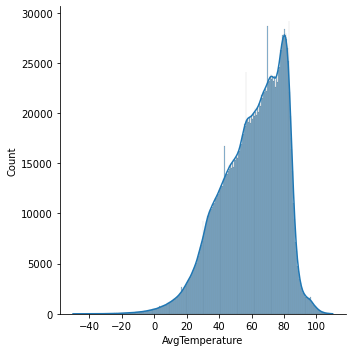

In [17]:
m_t=data['AvgTemperature'].mean()
sns.displot(data['AvgTemperature'],kde=True)
print('The Mean temperature of the world across the years has been',m_t,'Fahrenheit')

<h4>2. Hottest Place in the World</h4>

In [18]:
data[data['AvgTemperature']== max(data['AvgTemperature'])]

Region Country State    City  Month  Day  Year  AvgTemperature
1034962  Middle East  Kuwait   NaN  Kuwait      8    1  2012           110.0

<h4>3. Coldest Place in the world </h4>

In [19]:
data[data['AvgTemperature']== min(data['AvgTemperature'])]

Region Country   State       City  Month  Day  Year  \
1499140  North America      US  Alaska  Fairbanks     12   31  1999   

         AvgTemperature  
1499140           -50.0

<h4>4. Average Temperatures across Regions </h4>

Text(0.5, 1.0, 'Mean Temperature by Regions')

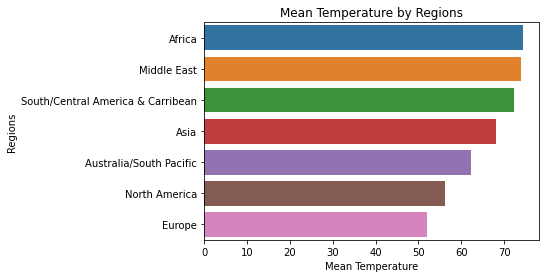

In [20]:
region_stats = data.groupby('Region')['AvgTemperature'].agg(mean_data='mean',std_data = 'std',min_data = 'min',max_data = 'max',median_data = 'median').reset_index().sort_values('mean_data',ascending=False)
sns.barplot(x='mean_data',y='Region',data=region_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('Regions')
plt.title("Mean Temperature by Regions")

<h4>5. Top 10 Hottest cities </h4>

Text(0.5, 1.0, 'Top 10 Hottest Cities')

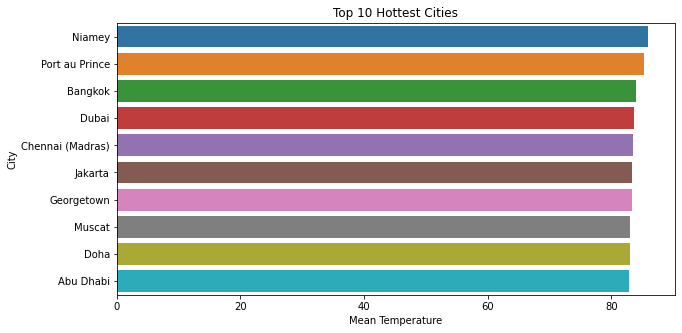

In [21]:
plt.figure(figsize=(10,5),)
city_stats = data.groupby('City')['AvgTemperature'].agg(mean_data='mean',std_data = 'std',min_data = 'min',max_data = 'max',median_data = 'median').reset_index().sort_values('mean_data',ascending=False).head(10)
sns.barplot(x='mean_data',y='City',data=city_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('City')
plt.title("Top 10 Hottest Cities")

<h4>6. Top 10 Coldest cities</h4>

Text(0.5, 1.0, 'Top 10 Coldest Cities')

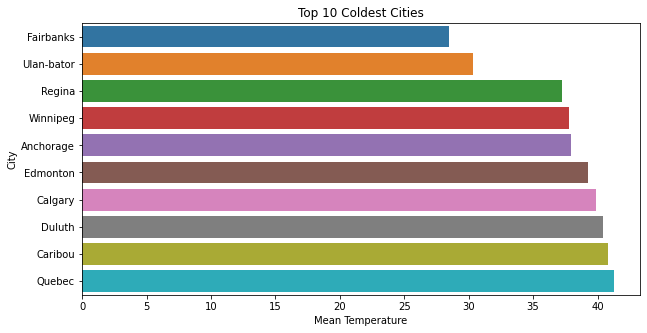

In [22]:
plt.figure(figsize=(10,5),)
city_stats = data.groupby('City')['AvgTemperature'].agg(mean_data='mean',std_data = 'std',min_data = 'min',max_data = 'max',median_data = 'median').reset_index().sort_values('mean_data').head(10)
sns.barplot(x='mean_data',y='City',data=city_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('City')
plt.title("Top 10 Coldest Cities")

<h4>7. Average temperature of the World over the years</h4>

<h6>Lineplot</h6>

Text(0.5, 1.0, 'Average Temperature of the World over time')

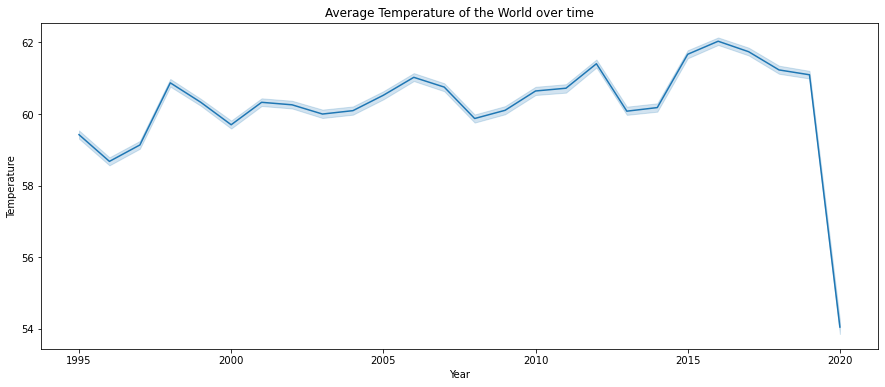

In [23]:
plt.figure(figsize=(15,6),)
sns.lineplot(data=data,x='Year',y='AvgTemperature')
plt.ylabel('Temperature')
plt.title('Average Temperature of the World over time')

*There is a drastic drop from 2019 to 2020 because the dataset is incomplete for 2020 and hence the average temperature is relatively very low

In [24]:
# temperature stats, grouped by country and year
dfc = (
       data.groupby(['Year','Country'])['AvgTemperature'].agg(['mean'])
      .reset_index()
      .rename(columns={'mean': 'AvgTemperature'})
      .merge(iso,left_on='Country',right_on='Country')
      .sort_values(by=['Year','Country'])
      )
dfc['Rank_hottest'] = dfc.groupby(by=['Year'])['AvgTemperature'].rank(method="min",ascending=False)
dfc['Rank_coldest'] = dfc.groupby(by=['Year'])['AvgTemperature'].rank(method="min",ascending=True)
dfc.head()   #grouped_dataset

Year    Country  AvgTemperature ISO_Code  Rank_hottest  Rank_coldest
0    1995    Algeria       64.410468      DZA          65.0          49.0
26   1995  Argentina       61.701370      ARG          71.0          43.0
52   1995  Australia       61.501753      AUS          72.0          42.0
78   1995    Austria       50.251233      AUT          96.0          18.0
104  1995    Bahamas       77.110989      BHS          36.0          78.0

<h6>Choropleth Animation</h6>

In [25]:
#plotting an animated choropleth map
fig = (
   px.choropleth(
                 dfc               
                ,locations='ISO_Code'               
                ,color='AvgTemperature'
                ,hover_name='Country'  
                ,hover_data={'ISO_Code':False, 'Year':True,'AvgTemperature':':.2f'}
                ,animation_frame='Year'   
                ,color_continuous_scale='Portland' 
                ,height=600)
  .update_layout(
                 title_text='World average temperature dynamics'
                ,title_x=0.3
                ,margin=dict(r=10, t=40, b=10, l=10)
                ,coloraxis_colorbar_title='Temp °C')
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 800
fig.show()

<h4><b>Insight</b>: Through the graphs we noticed the Average Temperature of the world has increased over the years and that could mainly be attributed to the rise in emission levels and an increase in global warming activities.</h4>

<h2>Region</h2>

In [26]:
a=data.Region.unique()
print("There are a total of",len(a),"Regions.")
print(a)

There are a total of 7 Regions.
['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']


Selected <b>Asia</b> amongst all regions

In [7]:
#taking out every region for visualization purpose

asia = data[data['Region']=='Asia']
europe = data[data['Region']=='Europe']
oceania = data[data['Region']=='Australia/South Pacific']
south_a = data[data['Region']=='South/Central America & Carribean']
africa = data[data['Region']=='Africa']
north_a = data[data['Region']=='North America']
arab = data[data['Region']=='Middle East']

In [28]:
asia  #inside the asia dataset

Region     Country State   City  Month  Day  Year  AvgTemperature
251118   Asia  Bangladesh   NaN  Dhaka      1    1  1995            64.8
251119   Asia  Bangladesh   NaN  Dhaka      1    2  1995            58.4
251121   Asia  Bangladesh   NaN  Dhaka      1    4  1995            59.6
251122   Asia  Bangladesh   NaN  Dhaka      1    5  1995            64.9
251124   Asia  Bangladesh   NaN  Dhaka      1    7  1995            71.9
...       ...         ...   ...    ...    ...  ...   ...             ...
567776   Asia     Vietnam   NaN  Hanoi      5    9  2020            84.1
567777   Asia     Vietnam   NaN  Hanoi      5   10  2020            87.0
567778   Asia     Vietnam   NaN  Hanoi      5   11  2020            84.5
567779   Asia     Vietnam   NaN  Hanoi      5   12  2020            80.9
567780   Asia     Vietnam   NaN  Hanoi      5   13  2020            82.4

[306163 rows x 8 columns]

<h4>1. Mean Temperature across months in Asia</h4>

Text(0.5, 1.0, 'Mean Temperature by Month in the region of Asia')

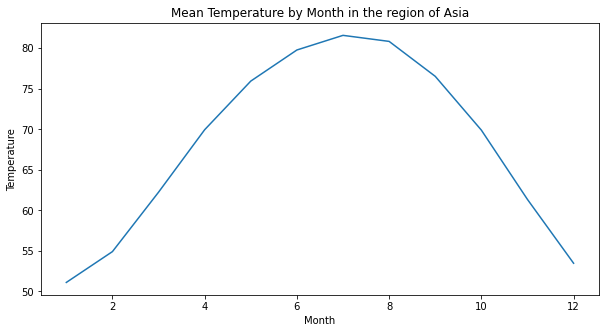

In [29]:
plt.figure(figsize=(10,5),)
asia_stats = asia.groupby('Month')['AvgTemperature'].agg(mean_data='mean').reset_index()
sns.lineplot(x='Month',y='mean_data',data=asia_stats)
plt.xlabel("Month")
plt.ylabel('Temperature')
plt.title("Mean Temperature by Month in the region of Asia")

<h4>2. Hottest instance in Asia</h4>

In [30]:
asia[asia['AvgTemperature']== max(asia['AvgTemperature'])]

Region Country State   City  Month  Day  Year  AvgTemperature
341564   Asia   India   NaN  Delhi      5   28  1998           103.7

<h4>3. Coldest instance in Asia</h4>

In [31]:
asia[asia['AvgTemperature']== min(asia['AvgTemperature'])]

Region   Country State        City  Month  Day  Year  AvgTemperature
424845   Asia  Mongolia   NaN  Ulan-bator      1    8  2001           -37.2

<h4>4. Top 10 Hottest cities in Asia</h4>

Text(0.5, 1.0, 'Top 10 Hottest Cities')

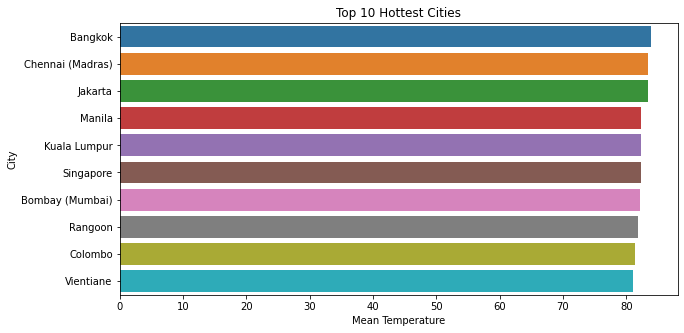

In [32]:
plt.figure(figsize=(10,5),)
city_stats = asia.groupby('City')['AvgTemperature'].agg(mean_data='mean',std_data = 'std',min_data = 'min',max_data = 'max',median_data = 'median').reset_index().sort_values('mean_data',ascending=False).head(10)
sns.barplot(x='mean_data',y='City',data=city_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('City')
plt.title("Top 10 Hottest Cities")

<h4>5. Coldest Cities in Asia</h4>

Text(0.5, 1.0, 'Top 10 Coldest Cities')

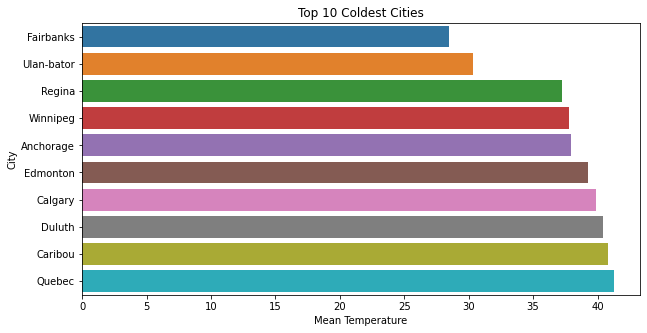

In [33]:
plt.figure(figsize=(10,5),)
city_stats = data.groupby('City')['AvgTemperature'].agg(mean_data='mean',std_data = 'std',min_data = 'min',max_data = 'max',median_data = 'median').reset_index().sort_values('mean_data').head(10)
sns.barplot(x='mean_data',y='City',data=city_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('City')
plt.title("Top 10 Coldest Cities")

<h4>5. Average Temperature of Asia over the years</h4>

Text(0.5, 1.0, 'Average Temperature of Asia over time')

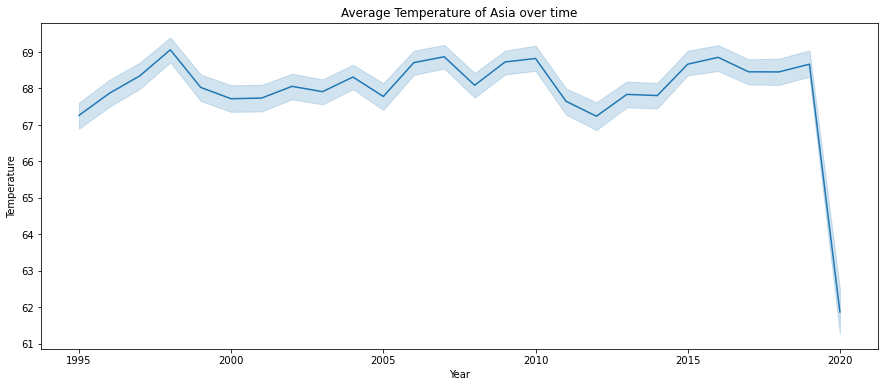

In [34]:
plt.figure(figsize=(15,6),)
sns.lineplot(data=asia,x='Year',y='AvgTemperature')
plt.ylabel('Temperature')
plt.title('Average Temperature of Asia over time')

*There is a drastic drop from 2019 to 2020 because the dataset is incomplete for 2020 and hence the average temperature is relatively very low

<h2>Country</h2>

In [35]:
a=asia.Country.unique()
print("There are a total of",len(a),"Countries in Asia.")
print(a)

There are a total of 25 Countries in Asia.
['Bangladesh' 'China' 'Hong Kong' 'India' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kyrgyzstan' 'Laos' 'Malaysia' 'Mongolia' 'Myanmar (Burma)' 'Nepal'
 'North Korea' 'Pakistan' 'Philippines' 'Singapore' 'South Korea'
 'Sri Lanka' 'Taiwan' 'Tajikistan' 'Thailand' 'Turkmenistan' 'Uzbekistan'
 'Vietnam']


Selected <b>India</b> amongst all countries

In [8]:
#taking out data for india
india=asia[asia['Country']=='India']
india

Region Country State             City  Month  Day  Year  AvgTemperature
312523   Asia   India   NaN  Bombay (Mumbai)      1    1  1995            71.8
312524   Asia   India   NaN  Bombay (Mumbai)      1    2  1995            72.0
312525   Asia   India   NaN  Bombay (Mumbai)      1    3  1995            70.3
312526   Asia   India   NaN  Bombay (Mumbai)      1    4  1995            69.7
312527   Asia   India   NaN  Bombay (Mumbai)      1    5  1995            71.3
...       ...     ...   ...              ...    ...  ...   ...             ...
349581   Asia   India   NaN            Delhi      5    8  2020            89.9
349582   Asia   India   NaN            Delhi      5    9  2020            92.3
349583   Asia   India   NaN            Delhi      5   10  2020            81.9
349584   Asia   India   NaN            Delhi      5   11  2020            84.7
349585   Asia   India   NaN            Delhi      5   12  2020            88.1

[37063 rows x 8 columns]

In [37]:
a=india.City.unique()
print("There are a total of",len(a),"Cities in India.")
print(a)

There are a total of 4 Cities in India.
['Bombay (Mumbai)' 'Calcutta' 'Chennai (Madras)' 'Delhi']


<h4>1. Mean Temperature across months in India</h4>

Text(0.5, 1.0, 'Mean Temperature by Month in India')

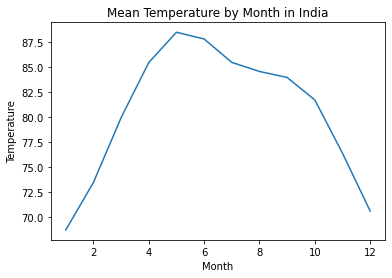

In [38]:
india_stats = india.groupby('Month')['AvgTemperature'].agg(mean_data='mean').reset_index()
sns.lineplot(x='Month',y='mean_data',data=india_stats)
plt.xlabel("Month")
plt.ylabel('Temperature')
plt.title("Mean Temperature by Month in India")

<h4>2. Hottest instance in India</h4>

In [39]:
india[india['AvgTemperature']== max(india['AvgTemperature'])]

Region Country State   City  Month  Day  Year  AvgTemperature
341564   Asia   India   NaN  Delhi      5   28  1998           103.7

<h4>3. Coldest instance in India</h4>

In [40]:
india[india['AvgTemperature']== min(india['AvgTemperature'])]

Region Country State   City  Month  Day  Year  AvgTemperature
346901   Asia   India   NaN  Delhi      1    6  2013            43.9

<h4>4. Average temperatures across Cities in India</h4>

Text(0.5, 1.0, 'Mean Temperature by Cities')

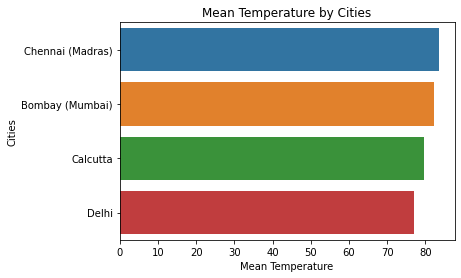

In [41]:
city_stats = india.groupby('City')['AvgTemperature'].agg(mean_india='mean',std_india = 'std',min_india = 'min',max_india = 'max',median_india = 'median').reset_index().sort_values('mean_india',ascending=False)
sns.barplot(x='mean_india',y='City',data=city_stats)
plt.xlabel("Mean Temperature")
plt.ylabel('Cities')
plt.title("Mean Temperature by Cities")

<h1>Pridiction through LSTM</h1>

In [3]:
#importing libraries for algorithm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy import stats

# import the relevant Keras modules
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, LSTM, Dropout, GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

#some additional libraries
import random
from datetime import datetime

<h3>Data Cleaning, Pre Processing</h3>

In [10]:
#taking out data for delhi
delhi=india[india['City']=='Delhi']
delhi.head()

Region Country State   City  Month  Day  Year  AvgTemperature
340321   Asia   India   NaN  Delhi      1    1  1995            50.7
340322   Asia   India   NaN  Delhi      1    2  1995            52.1
340323   Asia   India   NaN  Delhi      1    3  1995            53.8
340324   Asia   India   NaN  Delhi      1    4  1995            53.7
340325   Asia   India   NaN  Delhi      1    5  1995            54.5

<h5>Checking if records are complete for all years<h5>

In [12]:
delhi["Year"].value_counts()

2000    366
2008    366
2012    366
2004    366
1996    366
2016    366
2015    366
2010    365
1997    365
2007    365
1999    365
2014    365
2006    365
1998    365
2013    365
2005    365
2017    365
2018    365
2002    365
2001    365
2009    365
2019    365
2011    365
2003    365
1995    365
2020    133
Name: Year, dtype: int64

<h5>Imputing missing values</h5>

In [14]:
delhi["AvgTemperature"] = np.where(delhi["AvgTemperature"] == -99, np.nan, delhi["AvgTemperature"])
delhi.isnull().sum()

<ipython-input-14-7bc7c397050b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region               0
Country              0
State             9265
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature      60
dtype: int64

<h5>Filling missing values</h5>

In [15]:
delhi["AvgTemperature"] = delhi["AvgTemperature"].ffill()
delhi.isnull().sum()

<ipython-input-15-16bc87e62e19>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region               0
Country              0
State             9265
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

Since there is no single column that contains the date, creating a new column called Time_steps to combine the year month and date fields

In [16]:
delhi.dtypes
delhi["Time_steps"] = pd.to_datetime((delhi.Year*10000 + delhi.Month*100 + delhi.Day).apply(str),format='%Y%m%d')
delhi.head()

<ipython-input-16-7083c9372ae1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Country State   City  Month  Day  Year  AvgTemperature  \
340321   Asia   India   NaN  Delhi      1    1  1995            50.7   
340322   Asia   India   NaN  Delhi      1    2  1995            52.1   
340323   Asia   India   NaN  Delhi      1    3  1995            53.8   
340324   Asia   India   NaN  Delhi      1    4  1995            53.7   
340325   Asia   India   NaN  Delhi      1    5  1995            54.5   

       Time_steps  
340321 1995-01-01  
340322 1995-01-02  
340323 1995-01-03  
340324 1995-01-04  
340325 1995-01-05

In [17]:
def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temprature")
    plt.grid(True)

Plotting the timeseries for the entire duration

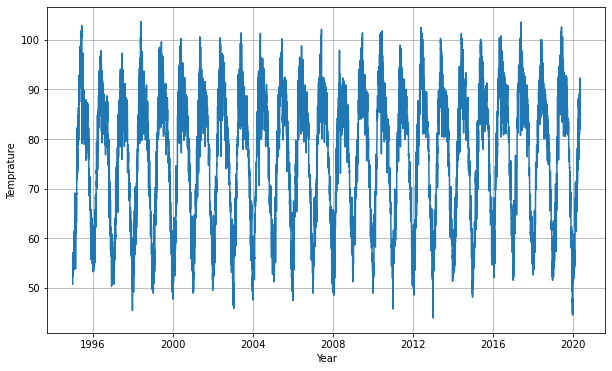

In [18]:
time_step = delhi["Time_steps"].tolist()
temprature = delhi["AvgTemperature"].tolist()

series = np.array(temprature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

Plotting for recent one year only

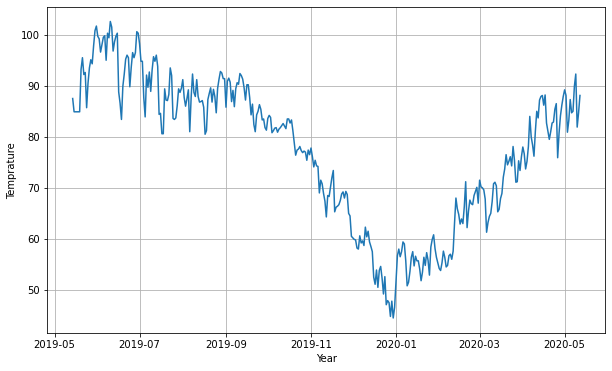

In [19]:
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

There are totally 9,266 records on the dataset. We will keep 8000 records for training (85%) and keep remaining 15% for testing

In [20]:
split_time = 8000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

<h4>Naive forecast</h4>

In [21]:
naive_forecast = series[split_time - 1:-1]

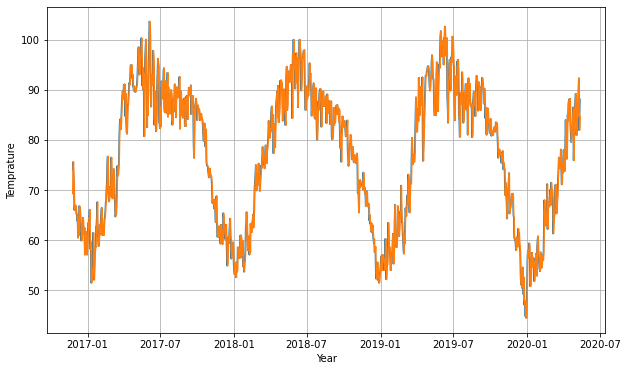

In [22]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

Since the plot above is so crowded, we will take for a small section of the dataset and visualize it.

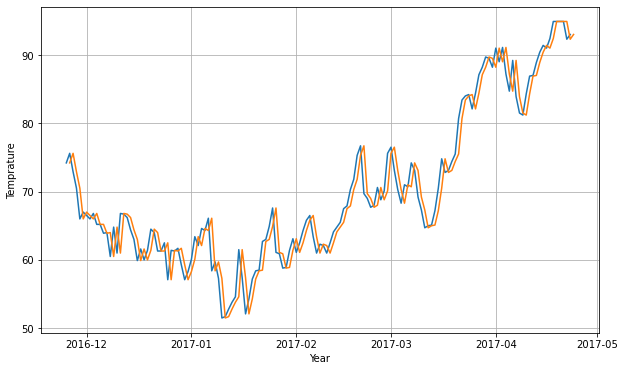

In [23]:
#Zoom in and see only few points
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

<h4>Moving average forecast</h4>

In [25]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

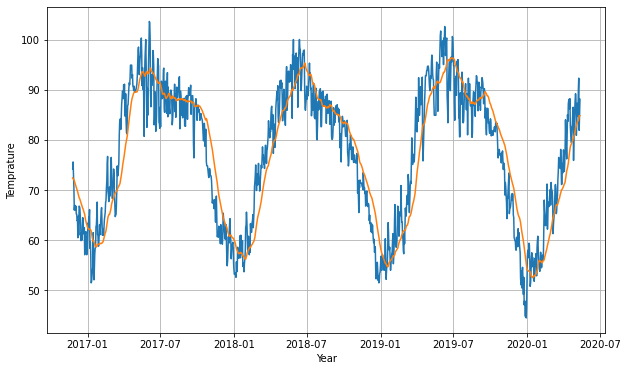

In [26]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

<h4>Removing trends with differencing</h4>

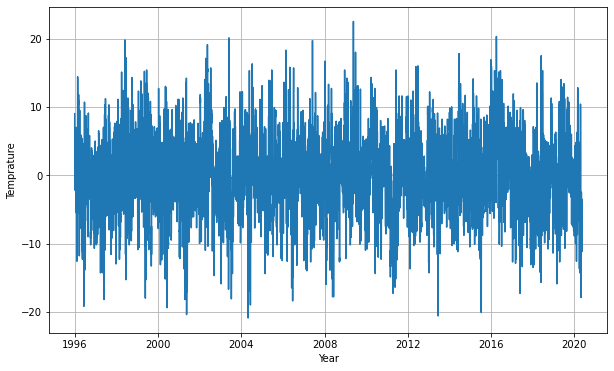

In [28]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

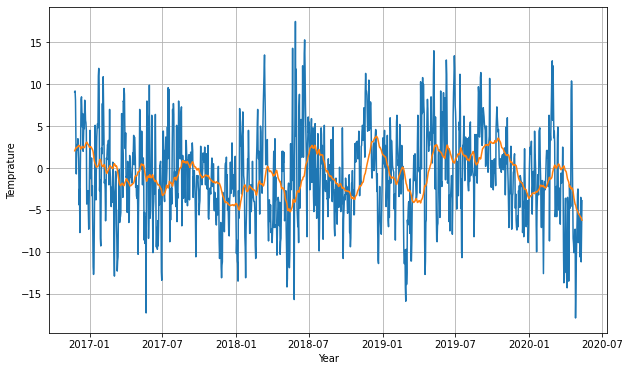

In [29]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

<h4>Restoring trend and seasonality</h4>

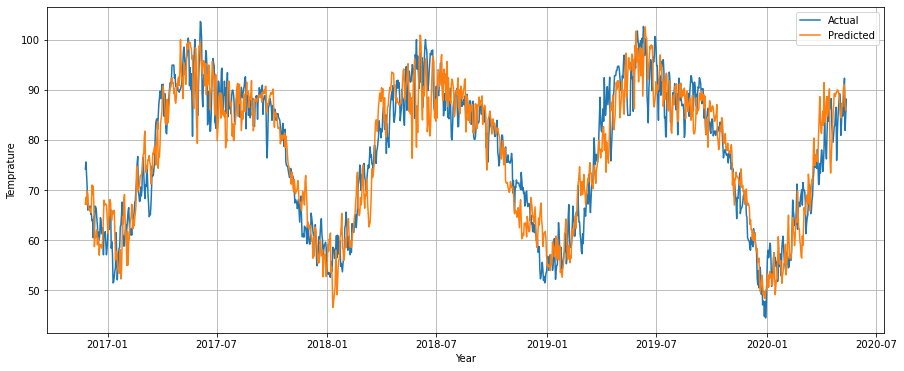

In [60]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(15, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.legend(["Actual","Predicted"])
plt.show()

<h5>The above plot has a lot of noise. To smooth it again, we do a moving average on that</h5>

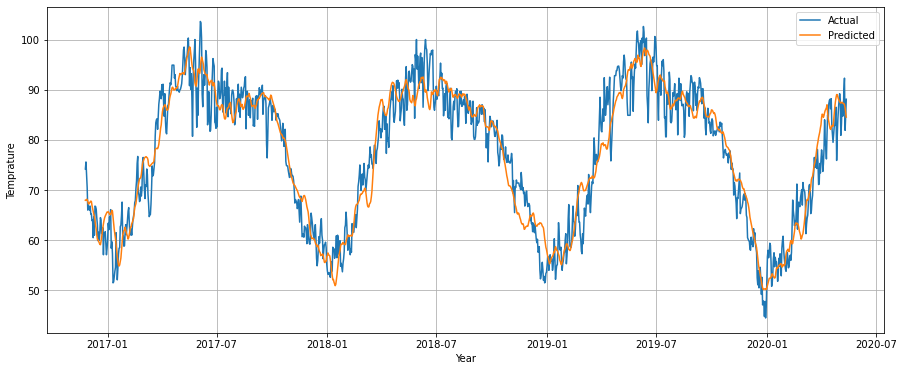

In [59]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(15, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.legend(["Actual","Predicted"])
plt.show()

<h4>Window Dataset</h4>

In [36]:
import tensorflow as tf

Step 1: Converting the numpy array into a tensor using tensor_slices

In [37]:
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())

[50.7]
[52.1]
[53.8]
[53.7]
[54.5]
[54.3]
[57.1]
[55.6]
[54.]
[52.4]
[54.8]
[54.5]
[55.5]
[56.4]
[55.8]
[56.4]
[53.7]
[53.7]
[54.5]
[56.]


Step 2: tf window option groups 5 (window size) into a single line

In [38]:
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[50.7] [52.1] [53.8] [53.7] [54.5] 
[52.1] [53.8] [53.7] [54.5] [54.3] 
[53.8] [53.7] [54.5] [54.3] [57.1] 
[53.7] [54.5] [54.3] [57.1] [55.6] 
[54.5] [54.3] [57.1] [55.6] [54.] 
[54.3] [57.1] [55.6] [54.] [52.4] 
[57.1] [55.6] [54.] [52.4] [54.8] 
[55.6] [54.] [52.4] [54.8] [54.5] 
[54.] [52.4] [54.8] [54.5] [55.5] 
[52.4] [54.8] [54.5] [55.5] [56.4] 
[54.8] [54.5] [55.5] [56.4] [55.8] 
[54.5] [55.5] [56.4] [55.8] [56.4] 
[55.5] [56.4] [55.8] [56.4] [53.7] 
[56.4] [55.8] [56.4] [53.7] [53.7] 
[55.8] [56.4] [53.7] [53.7] [54.5] 
[56.4] [53.7] [53.7] [54.5] [56.] 
[53.7] [53.7] [54.5] [56.] 
[53.7] [54.5] [56.] 
[54.5] [56.] 
[56.] 


Step 3: Drop reminder set to True will drop the variables which are not having the grouping

In [39]:
dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[50.7] [52.1] [53.8] [53.7] [54.5] 
[52.1] [53.8] [53.7] [54.5] [54.3] 
[53.8] [53.7] [54.5] [54.3] [57.1] 
[53.7] [54.5] [54.3] [57.1] [55.6] 
[54.5] [54.3] [57.1] [55.6] [54.] 
[54.3] [57.1] [55.6] [54.] [52.4] 
[57.1] [55.6] [54.] [52.4] [54.8] 
[55.6] [54.] [52.4] [54.8] [54.5] 
[54.] [52.4] [54.8] [54.5] [55.5] 
[52.4] [54.8] [54.5] [55.5] [56.4] 
[54.8] [54.5] [55.5] [56.4] [55.8] 
[54.5] [55.5] [56.4] [55.8] [56.4] 
[55.5] [56.4] [55.8] [56.4] [53.7] 
[56.4] [55.8] [56.4] [53.7] [53.7] 
[55.8] [56.4] [53.7] [53.7] [54.5] 
[56.4] [53.7] [53.7] [54.5] [56.] 


Step 4: flat map option will group the 5 observation in a single tensor variable

In [40]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[50.7]
 [52.1]
 [53.8]
 [53.7]
 [54.5]]
[[52.1]
 [53.8]
 [53.7]
 [54.5]
 [54.3]]
[[53.8]
 [53.7]
 [54.5]
 [54.3]
 [57.1]]
[[53.7]
 [54.5]
 [54.3]
 [57.1]
 [55.6]]
[[54.5]
 [54.3]
 [57.1]
 [55.6]
 [54. ]]
[[54.3]
 [57.1]
 [55.6]
 [54. ]
 [52.4]]
[[57.1]
 [55.6]
 [54. ]
 [52.4]
 [54.8]]
[[55.6]
 [54. ]
 [52.4]
 [54.8]
 [54.5]]
[[54. ]
 [52.4]
 [54.8]
 [54.5]
 [55.5]]
[[52.4]
 [54.8]
 [54.5]
 [55.5]
 [56.4]]
[[54.8]
 [54.5]
 [55.5]
 [56.4]
 [55.8]]
[[54.5]
 [55.5]
 [56.4]
 [55.8]
 [56.4]]
[[55.5]
 [56.4]
 [55.8]
 [56.4]
 [53.7]]
[[56.4]
 [55.8]
 [56.4]
 [53.7]
 [53.7]]
[[55.8]
 [56.4]
 [53.7]
 [53.7]
 [54.5]]
[[56.4]
 [53.7]
 [53.7]
 [54.5]
 [56. ]]


Step 5: map option will split the variables into X and y variables

In [41]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[50.7]
 [52.1]
 [53.8]
 [53.7]] [[54.5]]
[[52.1]
 [53.8]
 [53.7]
 [54.5]] [[54.3]]
[[53.8]
 [53.7]
 [54.5]
 [54.3]] [[57.1]]
[[53.7]
 [54.5]
 [54.3]
 [57.1]] [[55.6]]
[[54.5]
 [54.3]
 [57.1]
 [55.6]] [[54.]]
[[54.3]
 [57.1]
 [55.6]
 [54. ]] [[52.4]]
[[57.1]
 [55.6]
 [54. ]
 [52.4]] [[54.8]]
[[55.6]
 [54. ]
 [52.4]
 [54.8]] [[54.5]]
[[54. ]
 [52.4]
 [54.8]
 [54.5]] [[55.5]]
[[52.4]
 [54.8]
 [54.5]

Step 6: shuffle option will shuffle the dataset into random order.
Till the previous step, the observation would have been in the correct order. the shuffle will ensure that the data are randomly mixed up

In [42]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[52.4]
 [54.8]
 [54.5]
 [55.5]] [[56.4]]
[[53.7]
 [54.5]
 [54.3]
 [57.1]] [[55.6]]
[[54.3]
 [57.1]
 [55.6]
 [54. ]] [[52.4]]
[[54.5]
 [54.3]
 [57.1]
 [55.6]] [[54.]]
[[53.8]
 [53.7]
 [54.5]
 [54.3]] [[57.1]]
[[55.8]
 [56.4]
 [53.7]
 [53.7]] [[54.5]]
[[55.6]
 [54. ]
 [52.4]
 [54.8]] [[54.5]]
[[56.4]
 [55.8]
 [56.4]
 [53.7]] [[53.7]]
[[52.1]
 [53.8]
 [53.7]
 [54.5]] [[54.3]]
[[55.5]
 [56.4]
 [55.8]

Step 7: Batch option will put the variables into mini-batches suitable for training. It will group both X and y into mini batches

In [43]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
x =  [[[52.4]
  [54.8]
  [54.5]
  [55.5]]

 [[53.8]
  [53.7]
  [54.5]
  [54.3]]]
y =  [[[56.4]]

 [[57.1]]]
*************************
x =  [[[52.1]
  [53.8]
  [53.7]
  [54.5]]

 [[50.7]
  [52.1]
  [53.8]
  [53.7]]]
y =  [[[54.3]]

 [[54.5]]]
*************************
x =  [[[56.4]
  [55.8]
  [56.4]
  [53.7]]

 [[55.6]
  [54. ]
  [52.4]
  [54.8]]]
y =  [[[53.7]]

 [[54.5]]]
************************

Window size is how many observations in the past do you want to see before making a prediction. Batch size is similar to mini-batches set while training the neural network

In [44]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [45]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    To create a window dataset given a numpy as input
    
    Returns: A prefetched tensorflow dataset
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

<h4>Finding the correct learning rate</h4>

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(8000,)
Epoch 1/100
31/31 [==============================] - 6s 192ms/step - loss: 59.8893 - mae: 60.3893
Epoch 2/100
31/31 [==============================] - 5s 148ms/step - loss: 48.3545 - mae: 48.8545
Epoch 3/100
31/31 [==============================] - 4s 141ms/step - loss: 35.6176 - mae: 36.1175
Epoc

31/31 [==============================] - 4s 144ms/step - loss: 4.4027 - mae: 4.8822
Epoch 76/100
31/31 [==============================] - 4s 138ms/step - loss: 4.5497 - mae: 5.0295
Epoch 77/100
31/31 [==============================] - 4s 144ms/step - loss: 8.6243 - mae: 9.1110
Epoch 78/100
31/31 [==============================] - 4s 142ms/step - loss: 6.9538 - mae: 7.4393
Epoch 79/100
31/31 [==============================] - 4s 142ms/step - loss: 4.9763 - mae: 5.4576
Epoch 80/100
31/31 [==============================] - 4s 139ms/step - loss: 7.0947 - mae: 7.5798
Epoch 81/100
31/31 [==============================] - 4s 143ms/step - loss: 7.6361 - mae: 8.1227
Epoch 82/100
31/31 [==============================] - 4s 145ms/step - loss: 10.5981 - mae: 11.0881
Epoch 83/100
31/31 [==============================] - 4s 140ms/step - loss: 14.4834 - mae: 14.9762
Epoch 84/100
31/31 [==============================] - 4s 140ms/step - loss: 11.9296 - mae: 12.4220
Epoch 85/100
31/31 [=================

(1e-08, 0.0001, 0.0, 60.0)

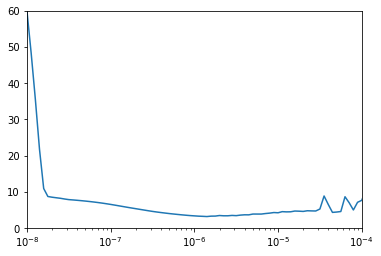

In [47]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

We take the step where the learning rate drops the steepest to train our neural network.

In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/500
80/80 [==============================] - 6s 69ms/step - loss: 22.5001 - mae: 22.9920
Epoch 2/500
80/80 [==============================] - 5s 69ms/step - loss: 8.7890 - mae: 9.2752
Epoch 3/500
80/80 [==============================] - 6s 70ms/step - loss: 7.9217 - mae: 8.4063
Epoch 4/500
80/80 [==============================] - 6s 71ms/step - loss: 7.2030 - mae: 7.6856
Epoch 5/500
80/80 

80/80 [==============================] - 6s 70ms/step - loss: 2.2328 - mae: 2.6835
Epoch 78/500
80/80 [==============================] - 6s 71ms/step - loss: 2.2192 - mae: 2.6693
Epoch 79/500
80/80 [==============================] - 6s 69ms/step - loss: 2.2144 - mae: 2.6646
Epoch 80/500
80/80 [==============================] - 5s 68ms/step - loss: 2.2037 - mae: 2.6537
Epoch 81/500
80/80 [==============================] - 6s 69ms/step - loss: 2.2066 - mae: 2.6568
Epoch 82/500
80/80 [==============================] - 5s 68ms/step - loss: 2.1936 - mae: 2.6434
Epoch 83/500
80/80 [==============================] - 5s 68ms/step - loss: 2.1947 - mae: 2.6449
Epoch 84/500
80/80 [==============================] - 6s 70ms/step - loss: 2.1830 - mae: 2.6326
Epoch 85/500
80/80 [==============================] - 5s 68ms/step - loss: 2.1777 - mae: 2.6272
Epoch 86/500
80/80 [==============================] - 5s 68ms/step - loss: 2.1823 - mae: 2.6324
Epoch 87/500
80/80 [==============================] -

80/80 [==============================] - 5s 67ms/step - loss: 1.9175 - mae: 2.3637
Epoch 162/500
80/80 [==============================] - 5s 67ms/step - loss: 1.9146 - mae: 2.3610
Epoch 163/500
80/80 [==============================] - 5s 69ms/step - loss: 1.9179 - mae: 2.3645
Epoch 164/500
80/80 [==============================] - 5s 67ms/step - loss: 1.9236 - mae: 2.3706
Epoch 165/500
80/80 [==============================] - 5s 67ms/step - loss: 1.9167 - mae: 2.3632
Epoch 166/500
80/80 [==============================] - 5s 68ms/step - loss: 1.9104 - mae: 2.3567
Epoch 167/500
80/80 [==============================] - 5s 67ms/step - loss: 1.9102 - mae: 2.3567
Epoch 168/500
80/80 [==============================] - 5s 68ms/step - loss: 1.9031 - mae: 2.3495
Epoch 169/500
80/80 [==============================] - 6s 69ms/step - loss: 1.9168 - mae: 2.3642
Epoch 170/500
80/80 [==============================] - 5s 67ms/step - loss: 1.9098 - mae: 2.3564
Epoch 171/500
80/80 [=======================

80/80 [==============================] - 6s 70ms/step - loss: 1.8043 - mae: 2.2495
Epoch 246/500
80/80 [==============================] - 5s 68ms/step - loss: 1.8032 - mae: 2.2482
Epoch 247/500
80/80 [==============================] - 5s 67ms/step - loss: 1.8107 - mae: 2.2561
Epoch 248/500
80/80 [==============================] - 6s 70ms/step - loss: 1.7990 - mae: 2.2437
Epoch 249/500
80/80 [==============================] - 5s 67ms/step - loss: 1.7974 - mae: 2.2424
Epoch 250/500
80/80 [==============================] - 6s 69ms/step - loss: 1.7923 - mae: 2.2370
Epoch 251/500
80/80 [==============================] - 5s 68ms/step - loss: 1.7889 - mae: 2.2333
Epoch 252/500
80/80 [==============================] - 5s 68ms/step - loss: 1.7895 - mae: 2.2341
Epoch 253/500
80/80 [==============================] - 5s 68ms/step - loss: 1.7941 - mae: 2.2388
Epoch 254/500
80/80 [==============================] - 5s 68ms/step - loss: 1.7959 - mae: 2.2408
Epoch 255/500
80/80 [=======================

80/80 [==============================] - 10s 123ms/step - loss: 1.7192 - mae: 2.1627
Epoch 330/500
80/80 [==============================] - 10s 121ms/step - loss: 1.7169 - mae: 2.1603
Epoch 331/500
80/80 [==============================] - 9s 114ms/step - loss: 1.7171 - mae: 2.1606
Epoch 332/500
80/80 [==============================] - 10s 125ms/step - loss: 1.7232 - mae: 2.1670
Epoch 333/500
80/80 [==============================] - 9s 119ms/step - loss: 1.7242 - mae: 2.1682
Epoch 334/500
80/80 [==============================] - 9s 119ms/step - loss: 1.7203 - mae: 2.1638
Epoch 335/500
80/80 [==============================] - 10s 121ms/step - loss: 1.7155 - mae: 2.1590
Epoch 336/500
80/80 [==============================] - 10s 122ms/step - loss: 1.7183 - mae: 2.1620
Epoch 337/500
80/80 [==============================] - 10s 123ms/step - loss: 1.7220 - mae: 2.1659
Epoch 338/500
80/80 [==============================] - 10s 120ms/step - loss: 1.7189 - mae: 2.1623
Epoch 339/500
80/80 [======

80/80 [==============================] - 9s 115ms/step - loss: 1.6696 - mae: 2.1119
Epoch 413/500
80/80 [==============================] - 9s 118ms/step - loss: 1.6702 - mae: 2.1128
Epoch 414/500
80/80 [==============================] - 9s 116ms/step - loss: 1.6771 - mae: 2.1203
Epoch 415/500
80/80 [==============================] - 9s 114ms/step - loss: 1.6720 - mae: 2.1146
Epoch 416/500
80/80 [==============================] - 9s 113ms/step - loss: 1.6714 - mae: 2.1141
Epoch 417/500
80/80 [==============================] - 9s 116ms/step - loss: 1.6672 - mae: 2.1095
Epoch 418/500
80/80 [==============================] - 9s 115ms/step - loss: 1.6700 - mae: 2.1125
Epoch 419/500
80/80 [==============================] - 9s 115ms/step - loss: 1.6725 - mae: 2.1153
Epoch 420/500
80/80 [==============================] - 9s 115ms/step - loss: 1.6715 - mae: 2.1140
Epoch 421/500
80/80 [==============================] - 9s 111ms/step - loss: 1.6683 - mae: 2.1109
Epoch 422/500
80/80 [=============

80/80 [==============================] - 8s 105ms/step - loss: 1.6395 - mae: 2.0811
Epoch 496/500
80/80 [==============================] - 8s 105ms/step - loss: 1.6386 - mae: 2.0802
Epoch 497/500
80/80 [==============================] - 8s 104ms/step - loss: 1.6406 - mae: 2.0823
Epoch 498/500
80/80 [==============================] - 9s 106ms/step - loss: 1.6385 - mae: 2.0802
Epoch 499/500
80/80 [==============================] - 8s 105ms/step - loss: 1.6399 - mae: 2.0817
Epoch 500/500
80/80 [==============================] - 9s 108ms/step - loss: 1.6394 - mae: 2.0811


In [49]:
def model_forecast(model, series, window_size):
    """
    Given a model object and a series for it to predict, this function will return the prediction
    """
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [50]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

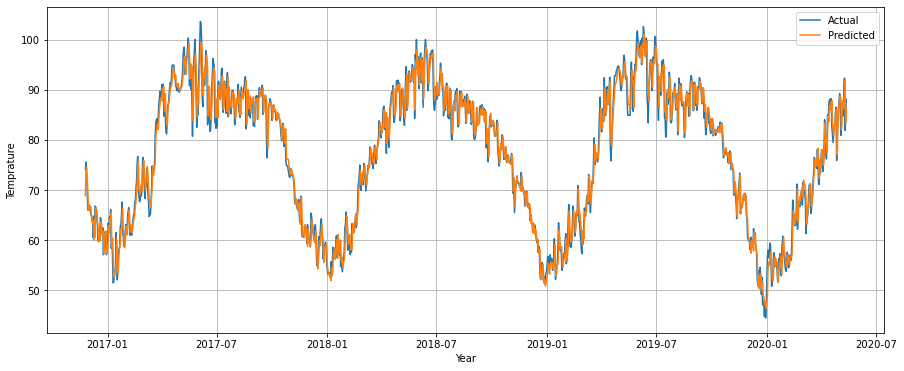

In [58]:
plt.figure(figsize=(15, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(["Actual","Predicted"])

In [52]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

2.0633416

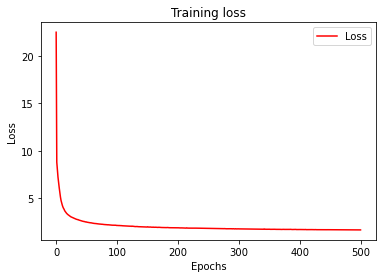

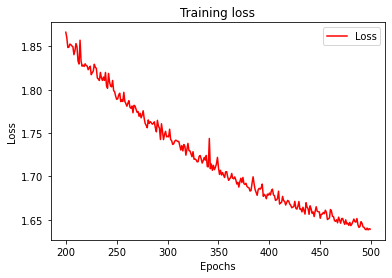

In [53]:
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])


<center><h1>Fin.</h1></center>